In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import notebook_utils as utils

In [2]:
def missing_logistic_spline(series):
    x, y = series[2], series[3]
    X = sm.add_constant(x)

    if len(x) < 2:
        return np.nan
    
    model = sm.Logit(y, X)
    try:
        results = model.fit(method = "Newton", disp = 0)
    except sm.tools.sm_exceptions.PerfectSeparationError:
        return np.nan
    max_x = 50000
    
    vals = sm.add_constant(list(range(max_x)))
    preds = results.predict(vals)
    x_over = [i for i in range(len(preds)) if preds[i] >= 0.9]
    
    if len(x_over) == 0:
        return np.nan
    else:
        final_val = min(x_over)
        if final_val <= 8196:
            return final_val
        else:
            return np.nan

In [3]:
folder = "../results/vary_lambda_q/"

combos = pd.read_csv(f"../lambda_q_combinations.txt", sep= "\t", header = None)
lambdas = np.unique(combos[0])
qs = np.unique(1/combos[1])

The following reads in and generates the heatmaps for the Uniform Simulation and Missing Simulation cases, respectively.

In [4]:
df = pd.read_csv(f"{folder}complete_binary/percolation_rf.txt", sep= "\t", header = None)
df = df.drop(columns = [3]).rename(columns = {4:3})
spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
spline_df.columns = ["value"]
pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
pivot_table.index = [round(i, 3) for i in pivot_table.index]
pivot_table.columns = [round(i, 3) for i in pivot_table.columns]

df = pd.read_csv(f"{folder}missing/percolation_rf.txt", sep= "\t", header = None)
df = df.drop(columns = [3]).rename(columns = {4:3})
spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(missing_logistic_spline).to_frame()
spline_df.columns = ["value"]
missing_pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
missing_pivot_table.index = [round(i, 3) for i in missing_pivot_table.index]
missing_pivot_table.columns = [round(i, 3) for i in missing_pivot_table.columns]

The following generates the theoretical heatmaps corresponding to the bounds for the case without missing data with parameters used in the Uniform Simulation and to the bounds for the case with missing data with the parameters used in the Missing Simulation case, respectively.

In [5]:
theory = []
n=256
ell = 1/9
for q in qs:
    row = []
    for p in lambdas:
        row.append(utils.top_down_theory_bound(p,q,ell,n, 1, 0.1))
    theory.append(row)
    
theory = pd.DataFrame(theory)
theory.index = [round(i, 3) for i in qs]
theory.columns = [round(i, 3) for i in lambdas]

theory_missing = []
n=256
ell = 1/9
for q in qs:
    row = []
    for p in lambdas:
        row.append(utils.missing_theory_bound(p,q,ell,n, 1, 0.1, 0.1))
    theory_missing.append(row)
    
theory_missing = pd.DataFrame(theory_missing)
theory_missing.index = [round(i, 3) for i in qs]
theory_missing.columns = [round(i, 3) for i in lambdas]

/data/yosef2/users/richardz/projects/theoretical_lineage_tracing_reproducibility/notebooks/notebook_utils.py:23: RuntimeWarning: divide by zero encountered in log
  val = 1/(2*p) * np.log((1-q)/q) + 1
/data/yosef2/users/richardz/projects/theoretical_lineage_tracing_reproducibility/notebooks/notebook_utils.py:80: RuntimeWarning: divide by zero encountered in log
  val = 1/(2*p) * np.log((1-q)/q) + 1


The following shows the theoretical heatmap for the bounds for the Threshold Algorithm in the Uniform Simulation with 10% stochastic missing data.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


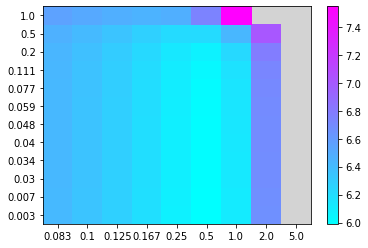

In [6]:
theory_missing[5.0] = np.nan
theory_missing.loc[1.0, 2.0] = np.nan

plt.pcolor(np.log10(theory_missing), cmap = 'cool')
plt.colorbar()

plt.yticks(np.arange(0.5, len(qs), 1), [round(i, 3) for i in qs])
plt.xticks(np.arange(0.5, len(lambdas), 1),[round(i, 3) for i in lambdas])

ax = plt.axes()
ax.set(facecolor = "lightgray")
plt.savefig("../Figures/Fig7/missing_theory.eps", format='eps')
plt.show()

The following shows the heatmap for the empirical minimum k for the Threshold Algorithm in the case of 10% stochastic missing data.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


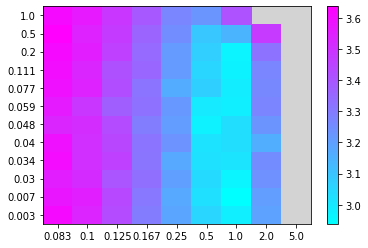

In [7]:
missing_pivot_table[5.0] = np.nan
plt.pcolor(np.log10(missing_pivot_table), cmap = 'cool')
plt.colorbar()

plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns)

ax = plt.axes()
ax.set(facecolor = "lightgray")
plt.savefig("../Figures/Fig7/missing_sim.eps", format='eps')
plt.show()

The following shows the bounds for the Threshold Algorithm in the Uniform Simulation with missing data divided by the bounds in the Uniform Simulation without missing data.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


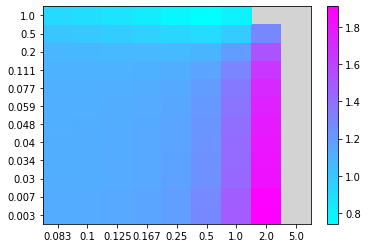

In [8]:
theor_diff = np.log10((theory_missing / theory))
theor_diff[5.0] = np.nan

plt.pcolor(theor_diff, cmap = 'cool')
plt.colorbar()

plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns)

ax = plt.axes()
ax.set(facecolor = "lightgray")
plt.savefig("../Figures/Fig7/theory_diff.eps", format='eps')
plt.show()

The following shows the empirical minimum k for the Threshold Algorithm in the Uniform Simulation with missing data divided by the empirical minimum k in the Uniform Simulation without missing data.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


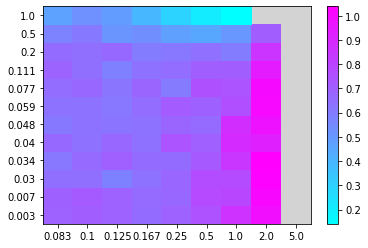

In [9]:
sim_diff = np.log10((missing_pivot_table / pivot_table))

plt.pcolor(sim_diff, cmap = 'cool')
plt.colorbar()

plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns)

ax = plt.axes()
ax.set(facecolor = "lightgray")
plt.savefig("../Figures/Fig7/sim_diff.eps", format='eps')
plt.show()